In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

dataFrame = pd.read_csv("../data/processed/charging_sessions_cleaned.csv", parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])


In [22]:
print(dataFrame.head())

   Unnamed: 0                        id            connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf 2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0 2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1 2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2 2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3 2020-01-02 14:00:01+00:00   

             disconnectTime          doneChargingTime  kWhDelivered  \
0 2020-01-02 19:11:15+00:00 2020-01-02 17:31:35+00:00        25.016   
1 2020-01-02 22:38:21+00:00 2020-01-02 20:18:05+00:00        33.097   
2 2020-01-03 00:39:22+00:00 2020-01-02 16:35:06+00:00         6.521   
3 2020-01-02 16:38:39+00:00 2020-01-02 15:18:45+00:00         2.355   
4 2020-01-02 22:08:40+00:00 2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID  spaceID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  AG-3F30  1-1-179-810   
1  1_1_1

C:\Users\malte\AppData\Local\Temp\ipykernel_20108\2055557746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['negative_diff_seconds'] = (filtered_data['doneChargingTime'] - filtered_data['disconnectTime']).dt.total_seconds()


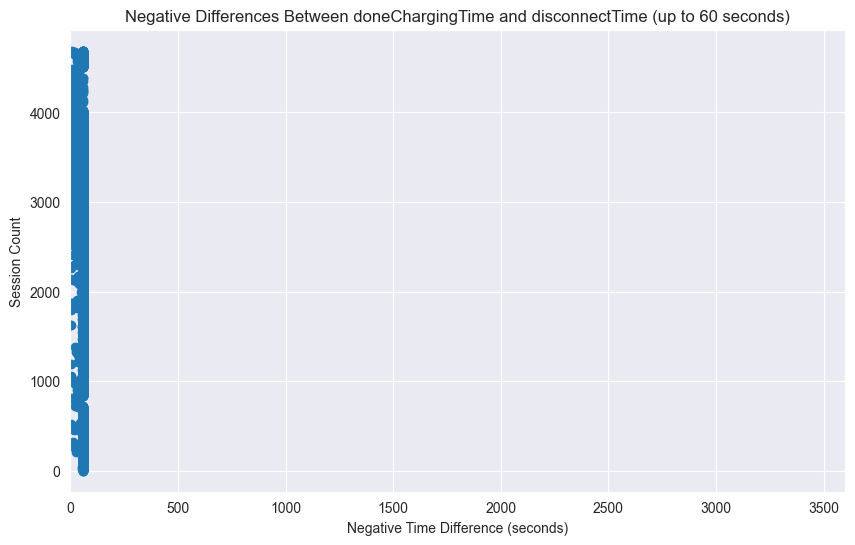

In [23]:
# Step 1: Convert columns to datetime
dataFrame['doneChargingTime'] = pd.to_datetime(dataFrame['doneChargingTime'])
dataFrame['disconnectTime'] = pd.to_datetime(dataFrame['disconnectTime'])

# Step 2: Filter rows where doneChargingTime is greater than disconnectTime
filtered_data = dataFrame[dataFrame['doneChargingTime'] > dataFrame['disconnectTime']]

# Step 3: Calculate the negative difference in seconds
filtered_data['negative_diff_seconds'] = (filtered_data['doneChargingTime'] - filtered_data['disconnectTime']).dt.total_seconds()

# Step 4: Create a scatter plot with time difference on the x-axis (limited to 60 seconds)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['negative_diff_seconds'], range(len(filtered_data)), marker='o')
plt.xlim(0, 3600)
plt.xlabel('Negative Time Difference (seconds)')
plt.ylabel('Session Count')
plt.title('Negative Differences Between doneChargingTime and disconnectTime (up to 60 seconds)')
plt.show()

In [24]:

filtered_data = dataFrame[dataFrame['doneChargingTime'] > dataFrame['disconnectTime']]
filtered_data.head(10)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'mil..."
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil..."
25,25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil..."
26,26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
33,33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil..."
45,45,5e23b149f9af8b5fe4b973fc,2020-01-02 18:41:22+00:00,2020-01-02 19:38:24+00:00,2020-01-02 19:39:23+00:00,5.430,1_1_191_812_2020-01-02 18:41:22.082480,1,AG-4F46,1-1-191-812,America/Los_Angeles,741.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil..."
49,49,5e23b149f9af8b5fe4b97400,2020-01-02 19:08:34+00:00,2020-01-02 22:52:36+00:00,2020-01-02 22:53:36+00:00,22.839,1_1_191_811_2020-01-02 19:08:34.209436,1,AG-4F42,1-1-191-811,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil..."
51,51,5e23b149f9af8b5fe4b97402,2020-01-02 19:30:53+00:00,2020-01-02 23:18:39+00:00,2020-01-02 23:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil..."
53,53,5e23b149f9af8b5fe4b97404,2020-01-02 20:31:37+00:00,2020-01-03 02:21:37+00:00,2020-01-03 02:22:34+00:00,33.645,1_1_178_823_2020-01-02 20:31:37.206013,1,AG-1F08,1-1-178-823,America/Los_Angeles,337.0,"[{'WhPerMile': 250, 'kWhRequested': 35.0, 'mil..."
57,57,5e23b149f9af8b5fe4b97408,2020-01-02 22:46:56+00:00,2020-01-03 00:49:34+00:00,2020-01-03 00:50:34+00:00,13.005,1_1_179_809_2020-01-02 22:46:56.495691,1,AG-3F27,1-1-179-809,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil..."


In [25]:
filtered_data["diff"] = filtered_data["doneChargingTime"] - filtered_data["disconnectTime"]
filtered_data.head(10)

C:\Users\malte\AppData\Local\Temp\ipykernel_20108\1999055044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["diff"] = filtered_data["doneChargingTime"] - filtered_data["disconnectTime"]


,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,diff
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'mil...",0 days 00:00:57
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil...",0 days 00:00:57
25,25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",0 days 00:00:57
26,26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",0 days 00:00:57
33,33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil...",0 days 00:00:57
45,45,5e23b149f9af8b5fe4b973fc,2020-01-02 18:41:22+00:00,2020-01-02 19:38:24+00:00,2020-01-02 19:39:23+00:00,5.430,1_1_191_812_2020-01-02 18:41:22.082480,1,AG-4F46,1-1-191-812,America/Los_Angeles,741.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",0 days 00:00:59
49,49,5e23b149f9af8b5fe4b97400,2020-01-02 19:08:34+00:00,2020-01-02 22:52:36+00:00,2020-01-02 22:53:36+00:00,22.839,1_1_191_811_2020-01-02 19:08:34.209436,1,AG-4F42,1-1-191-811,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil...",0 days 00:01:00
51,51,5e23b149f9af8b5fe4b97402,2020-01-02 19:30:53+00:00,2020-01-02 23:18:39+00:00,2020-01-02 23:19:36+00:00,4.405,1_1_179_810_2020-01-02 19:30:53.010234,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mil...",0 days 00:00:57
53,53,5e23b149f9af8b5fe4b97404,2020-01-02 20:31:37+00:00,2020-01-03 02:21:37+00:00,2020-01-03 02:22:34+00:00,33.645,1_1_178_823_2020-01-02 20:31:37.206013,1,AG-1F08,1-1-178-823,America/Los_Angeles,337.0,"[{'WhPerMile': 250, 'kWhRequested': 35.0, 'mil...",0 days 00:00:57
57,57,5e23b149f9af8b5fe4b97408,2020-01-02 22:46:56+00:00,2020-01-03 00:49:34+00:00,2020-01-03 00:50:34+00:00,13.005,1_1_179_809_2020-01-02 22:46:56.495691,1,AG-3F27,1-1-179-809,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil...",0 days 00:01:00


In [26]:
filtered_data.to_csv("../data/filtered_data.csv")